In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import plotly.express as px
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [90]:
df = pd.read_csv('/kaggle/input/nasa-battery-dataset/cleaned_dataset/metadata.csv')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   start_time           7565 non-null   object
 2   ambient_temperature  7565 non-null   int64 
 3   battery_id           7565 non-null   object
 4   test_id              7565 non-null   int64 
 5   uid                  7565 non-null   int64 
 6   filename             7565 non-null   object
 7   Capacity             2794 non-null   object
 8   Re                   1956 non-null   object
 9   Rct                  1956 non-null   object
dtypes: int64(3), object(7)
memory usage: 591.1+ KB


In [92]:
df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [93]:
print(df.columns)

Index(['type', 'start_time', 'ambient_temperature', 'battery_id', 'test_id',
       'uid', 'filename', 'Capacity', 'Re', 'Rct'],
      dtype='object')


In [94]:
impedance = df[df['type'] == 'impedance'][['test_id', 'battery_id', 'Re', 'Rct']].dropna()
impedance['Re'] = pd.to_numeric(impedance['Re'], errors='coerce')
impedance['Rct'] = pd.to_numeric(impedance['Rct'], errors='coerce')
print(impedance.head())

    test_id battery_id        Re       Rct
1         1      B0047  0.056058  0.200970
3         3      B0047  0.053192  0.164734
13       13      B0047  0.059638  0.210399
15       15      B0047  0.055125  0.175488
17       17      B0047  0.058878  0.190957


In [95]:
print(impedance.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1956 entries, 1 to 7560
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   test_id     1956 non-null   int64  
 1   battery_id  1956 non-null   object 
 2   Re          1947 non-null   float64
 3   Rct         1947 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 76.4+ KB
None


In [96]:
print(impedance.shape)

(1956, 4)


In [97]:
estimated_re = impedance.groupby('battery_id')['Re'].mean().reset_index()

print("Estimated Electrolyte Resistance (Re) per Battery (Ohms):")
print(estimated_re)

Estimated Electrolyte Resistance (Re) per Battery (Ohms):
   battery_id            Re
0       B0005  5.424465e-02
1       B0006  7.005151e-02
2       B0007  5.280665e-02
3       B0018  6.297578e-02
4       B0025  4.877618e-02
5       B0026  9.011823e-02
6       B0027  9.917740e-02
7       B0028  8.002976e-02
8       B0029  2.809331e-02
9       B0030  6.418748e-02
10      B0031  4.044504e-02
11      B0032  7.221722e-02
12      B0033  8.969975e-02
13      B0034  1.252533e-01
14      B0036  1.031345e-01
15      B0038  1.444839e-01
16      B0039  1.041319e-01
17      B0040  1.225589e-01
18      B0041  5.469201e-02
19      B0042  7.685226e-02
20      B0043  7.048841e-02
21      B0044  8.294249e-02
22      B0045  7.276125e-02
23      B0046  8.176339e-02
24      B0047  6.575817e-02
25      B0048  8.028774e-02
26      B0049  5.795451e-02
27      B0050 -8.074370e+13
28      B0051  7.833936e-02
29      B0052 -2.050985e+04
30      B0053  1.013836e-01
31      B0054  1.003669e-01
32      B0055  9.7

In [98]:
estimated_rct = impedance.groupby('battery_id')['Rct'].mean().reset_index()
print("Estimated Charge Transfer Resistance (Rct) per Battery (Ohms):")
print(estimated_rct)

Estimated Charge Transfer Resistance (Rct) per Battery (Ohms):
   battery_id           Rct
0       B0005  7.733956e-02
1       B0006  9.302025e-02
2       B0007  7.687381e-02
3       B0018  8.908997e-02
4       B0025  7.704753e-02
5       B0026  1.148913e-01
6       B0027  1.244205e-01
7       B0028  1.081472e-01
8       B0029  4.085891e-02
9       B0030  7.524767e-02
10      B0031  5.159026e-02
11      B0032  8.042184e-02
12      B0033  1.153484e-01
13      B0034  1.472626e-01
14      B0036  1.273352e-01
15      B0038  1.644239e-01
16      B0039  1.218759e-01
17      B0040  1.385718e-01
18      B0041  1.975392e-01
19      B0042  1.618374e-01
20      B0043  1.695115e-01
21      B0044  1.882437e-01
22      B0045  2.371797e-01
23      B0046  2.160649e-01
24      B0047  2.131596e-01
25      B0048  2.293387e-01
26      B0049  1.422844e-01
27      B0050  1.713203e+14
28      B0051  1.721921e-01
29      B0052  1.746030e+04
30      B0053  1.610181e-01
31      B0054  1.738652e-01
32      B0055

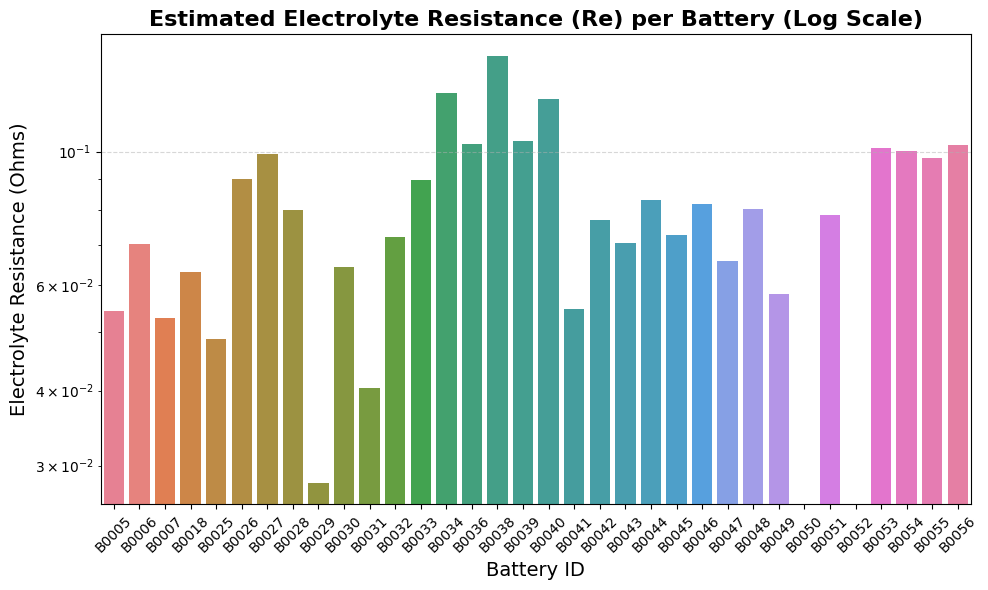

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(data=estimated_re, x='battery_id', y='Re', palette='husl')
plt.yscale('log')
plt.title('Estimated Electrolyte Resistance (Re) per Battery (Log Scale)', fontsize=16, weight='bold')
plt.xlabel('Battery ID', fontsize=14)
plt.ylabel('Electrolyte Resistance (Ohms)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

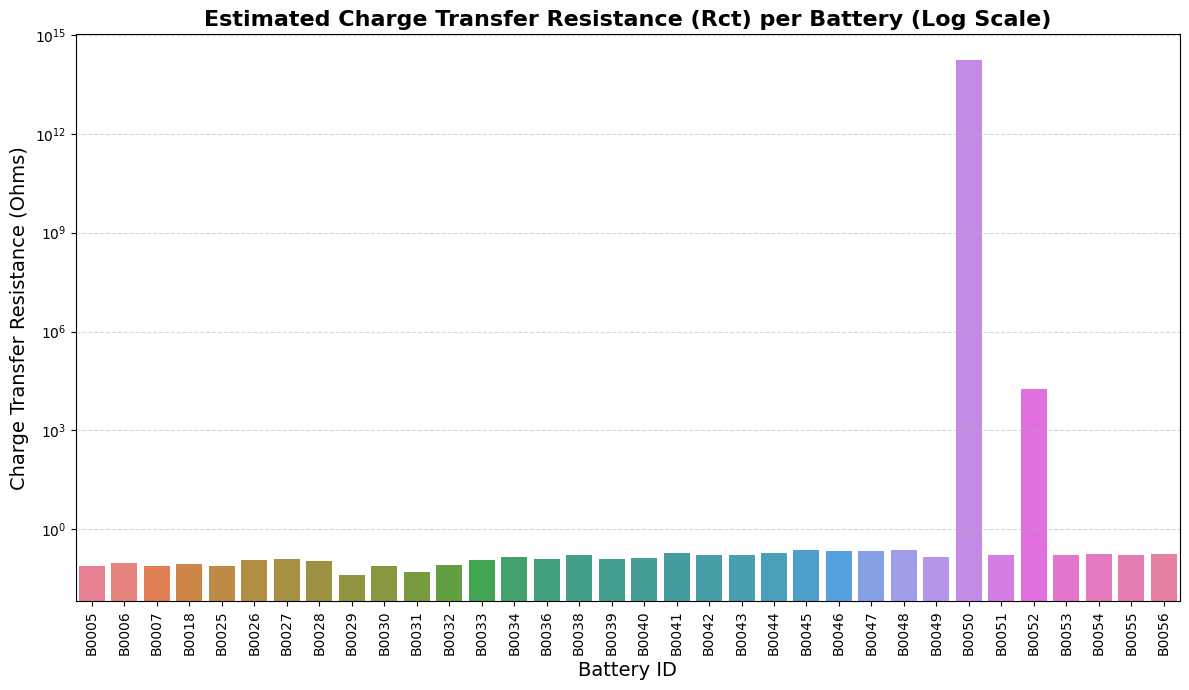

In [100]:
plt.figure(figsize=(12, 7))
sns.barplot(data=estimated_rct, x='battery_id', y='Rct', palette='husl')
plt.yscale('log')

plt.title('Estimated Charge Transfer Resistance (Rct) per Battery (Log Scale)', fontsize=16, weight='bold')
plt.xlabel('Battery ID', fontsize=14)
plt.ylabel('Charge Transfer Resistance (Ohms)', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()